## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

## Importing data

In [2]:
data = pd.read_csv('unit4.csv') 

In [3]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [4]:
data.shape

(90569, 28)

## Checking data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

## Checking for null values

In [6]:
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
7,INCOME,0.222847
26,TIMELAG,0.106582
0,STATE,0.000000
15,IC3,0.000000
25,NGIFTALL,0.000000
24,RFA_2,0.000000
23,MAXADATE,0.000000
22,NUMPRM12,0.000000
21,CARDPM12,0.000000
20,CARDPROM,0.000000


## Checking the numerical values

In [7]:
numericals = data.select_dtypes(np.number)
numericals.head()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865


*   The INCOME might be an important factor in predicting the gift value, so even though it has a lot of null values, we will not drop the column.

*   In this exercise, we will try a more precise method to replace the null values, instead of simply replacing them by a constant value, mean or median.

*   We will use a similar method for the column TIMELAG .

## Checking the **income's** histogram

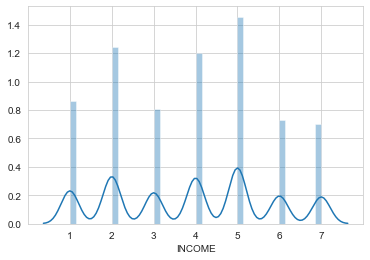

In [8]:
sns.distplot(data['INCOME'])

# Activity: Dealing with missing values.


Possible approaches:

**Drop:**

Let's consider the **gender** column. 

*   Can we guess in somehow what is the missing gender? **NO**. 
*   Can this column have any possible value compatible with a missing value? **NO**

Therefore, we are forced to drop the corresponding rows.

In [9]:
data['GENDER'].value_counts()

F    48668
M    37132
      2795
U     1635
J      336
C        2
A        1
Name: GENDER, dtype: int64

In [10]:
to_drop = data[~data['GENDER'].isin(['F','M'])].index.tolist()
data.drop(to_drop, inplace = True)
data.reset_index(drop=True)

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85795,FL,,4803,XXXX,,F,S2,6.0,H,733,875,4,3,285,288,333,334,11390,,59,23,5,12,9702,L4D,24,3.0,3.375000
85796,AK,,0,XXXX,,M,C2,NaN,,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,9702,L1G,1,NaN,25.000000
85797,TX,,5001,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,9702,L1F,1,NaN,20.000000
85798,MI,,3801,XXXX,X,M,C3,NaN,,376,377,4,3,263,264,319,345,12178,,33,14,7,17,9702,L3E,7,3.0,8.285714


In [11]:
data['GENDER'].value_counts()

F    48668
M    37132
Name: GENDER, dtype: int64

**Replace:**

If we have some other information about that tells us we can do this, even if it is not the missing information. 

For example, if the data follow an approximately normal distribution, we might want to substitute the missing values with the mean. You always need to have something that "tells you" that you can replace the data.

Let's consider column **HOMEOWNR**. 

*   Can we guess the value? **NO**
*   Can this column have any possible value compatible with a missing value? **YES**: 'unknown'.

Therefore, we can replace the value in this column by **'U'** for 'unknown'.

In [12]:
data['HOMEOWNR'].value_counts()

H    48503
U    19168
     18129
Name: HOMEOWNR, dtype: int64

In [13]:
np.unique(data['HOMEOWNR']).tolist()
data['HOMEOWNR'] = np.where(data['HOMEOWNR'] == ' ','U','H')

In [14]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,U,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,H,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,H,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


## Interpolation

Let's see which kind interpolation between two consecutive missing values for the **'INCOME'** column is best.

First **LOOK AT YOUR DATA!!!**

In [15]:
data[['INCOME']].head()

,INCOME
0,NaN
1,6.0
2,3.0
3,1.0
4,3.0


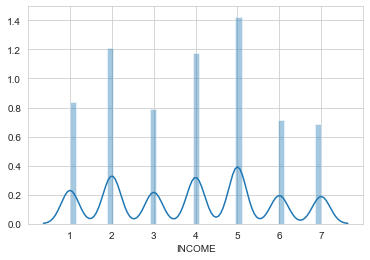

In [16]:
sns.distplot(data['INCOME'])

Let's try first with linear interpolation

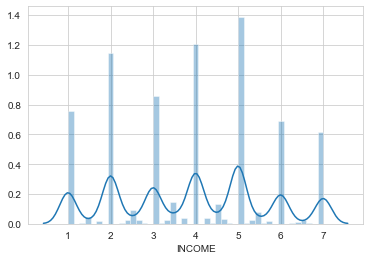

In [17]:
new_income_data_linear = data['INCOME'].interpolate(method='linear')
sns.distplot(new_income_data_linear)

Akima's interpolation

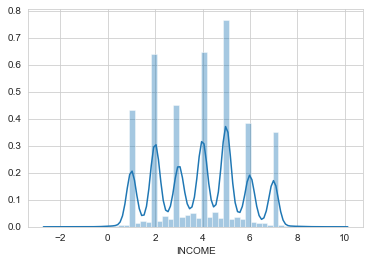

In [18]:
new_income_data_akima = data['INCOME'].interpolate(method='akima')
sns.distplot(new_income_data_akima)

Polynomial order 3.

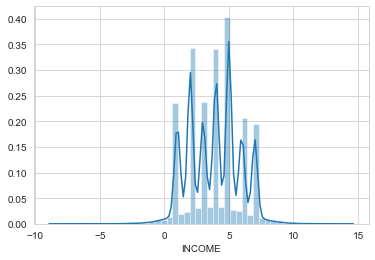

In [19]:
new_income_data_poly = data['INCOME'].interpolate(method='polynomial', order=3)
sns.distplot(new_income_data_poly)

Imputing with the mean

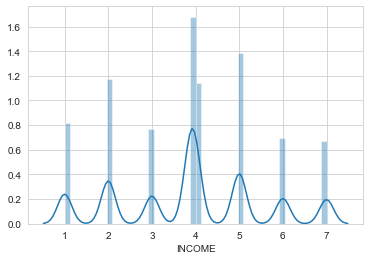

In [20]:
# Testing interpolation method with mean and median methods
points2 = data['INCOME'].fillna(np.mean(data['INCOME']))
sns.distplot(points2)

Does it makes sense at all?

# Activity: Using linear regression to impute missing values.

You already know how to predict a numerical ammount. Therefore, you can use other columns in order to predict the missing values of the column of you interest. Use 'HV1' and 'IC1' columns to predict the missing values of 'INCOME'.

**Hint**: For sake of simplicity, when you have NaN s, you work with them as if they were a test set.

In [21]:
data.shape

(85800, 28)

In [22]:
data['INCOME'].isna().sum()

17292

In [23]:
data['INCOME'].value_counts(dropna=False)

NaN    17292
5.0    14284
2.0    12117
4.0    11763
1.0     8414
3.0     7912
6.0     7144
7.0     6874
Name: INCOME, dtype: int64

In [24]:
data.columns

Index(['STATE', 'PVASTATE', 'DOB', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN',
       'INCOME', 'HOMEOWNR', 'HV1', 'HV2', 'HV3', 'HV4', 'IC1', 'IC2', 'IC3',
       'IC4', 'IC5', 'VETERANS', 'NUMPROM', 'CARDPROM', 'CARDPM12', 'NUMPRM12',
       'MAXADATE', 'RFA_2', 'NGIFTALL', 'TIMELAG', 'AVGGIFT'],
      dtype='object')

In [25]:
pd.__version__

'1.0.5'

In [26]:
np.__version__

'1.18.5'

In [27]:
from sklearn.linear_model import LinearRegression

X = data[~data.INCOME.isna()][['HV1', 'IC1']]
y = data[~data.INCOME.isna()]['INCOME']

X_nulls = data[data.INCOME.isna()][['HV1', 'IC1']]
#X_nulls2 = data[data['INCOME']][['HV1', 'IC1']]
#X_nulls2 = data.loc['INCOME',['HV1','IC1']]

model = LinearRegression().fit(X,y)
income_pred = model.predict(X_nulls)
#income_pred2 = model.predict(X_nulls2)

pd.DataFrame(np.around(income_pred,0)).isna().sum()

#income_pred.isna().sum()
#pd.DataFrame(np.round(income_pred)).isna().sum()
data[data.INCOME.isnull()]['INCOME'] = np.around(income_pred,0) # Income values are integers, therefore, we need to round!
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,U,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,H,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,H,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


Let's explore now the column 'TIMELAG'

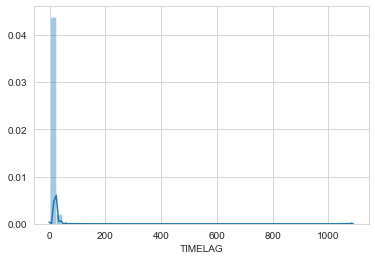

In [28]:
sns.distplot(data['TIMELAG'])

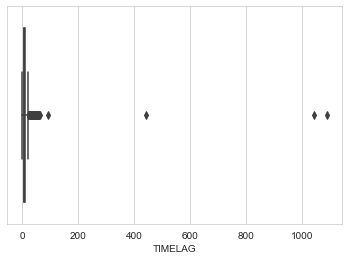

In [29]:
sns.boxplot(x=data['TIMELAG'])

[(-0.5, 10.0)]

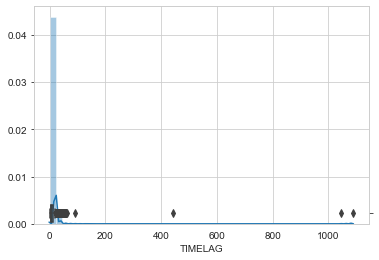

In [30]:
ax = sns.distplot(data['TIMELAG'])
ax2 = ax.twinx()
sns.boxplot(x=data['TIMELAG'], ax=ax2)
ax2.set(ylim=(-.5, 10))

Let's try some transformations to see if we can improve the distribution.

In [31]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

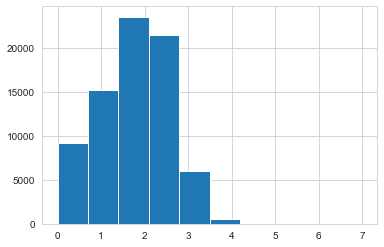

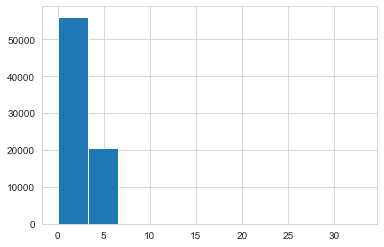

In [32]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, data['TIMELAG'])).hist()
plt.show()

pd.Series(map(sqrt_transfom_clean_, data['TIMELAG'])).hist()
plt.show()

As it can be seen in the figure, the logaritmic transformation works better than the sqrt. 

This could be expected given the extreme skewness of the data.

We could also us Box-Cox transformation, but probably the resulting distribution will be similar (alothough not the same, and even more, better). However, tihs is an illustrative example of how to proceed.

Let's assume that we don't know about Box-Cox and we want to apply the logaritmic transformation to the **'TIMELAG'** column.

In [33]:
data['TIMELAG'] = list(map(log_transfom_clean_, data['TIMELAG']))

Remember that our function, ignored the'0' and infinite values. The may want to replace them the mean of the NEW distribution.

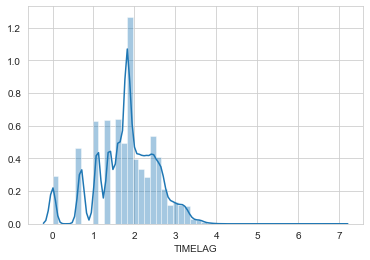

In [34]:
data['TIMELAG'] = data['TIMELAG'].fillna(np.mean(data['TIMELAG']))
sns.distplot(data['TIMELAG'])
plt.show()

It's not perfectly Gaussian but we improved it a lot.

# Activity: Logarithmic transformation.

A logarithmic scale is common to visualize exponential data as they are the inverse function of each other, so the result would be a linear visualization. This is needed because we visualize exponential functions properly otherwise. As an example, you can see some corona virus visualizations, like [this one] (https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/4.1-COVID-Logarithmicvslinear.png). Check the log transform with the IC n columns.

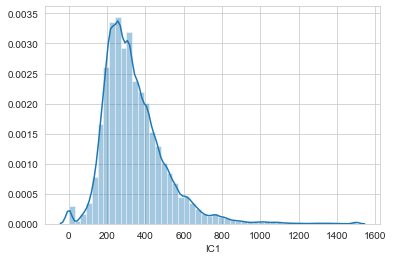

In [35]:
sns.distplot(data['IC1'])
#sns.distplot(np.log(data['IC1']))

In [36]:
data['IC1'].describe()

count    85800.000000
mean       339.389266
std        161.894143
min          0.000000
25%        231.000000
50%        309.000000
75%        414.000000
max       1500.000000
Name: IC1, dtype: float64

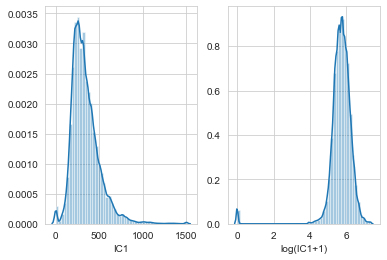

In [37]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC1'], ax=axes[0], axlabel='IC1')
sns.distplot(np.log(data['IC1']+1), ax=axes[1], axlabel='log(IC1+1)')

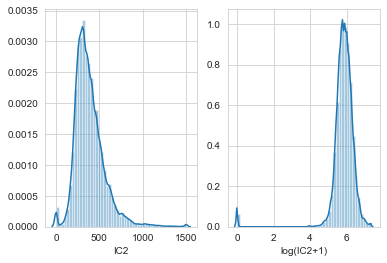

In [38]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC2'], ax=axes[0], axlabel='IC2')
sns.distplot(np.log(data['IC2']+1), ax=axes[1], axlabel='log(IC2+1)')

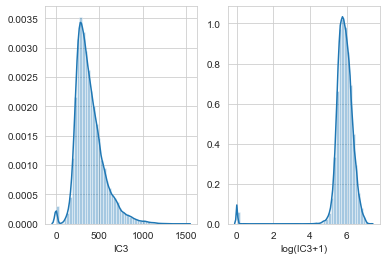

In [39]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC3'], ax=axes[0], axlabel = 'IC3')
sns.distplot(np.log(data['IC3']+1), ax=axes[1], axlabel = 'log(IC3+1)')

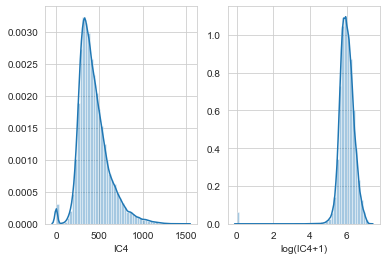

In [40]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC4'], ax=axes[0], axlabel = 'IC4')
sns.distplot(np.log(data['IC4']+1), ax=axes[1], axlabel = 'log(IC4+1)')

Even after using the transformation, there is still some skewness in the column TIMELAG . We will remove the outliers only from the right side of the distribution plot.

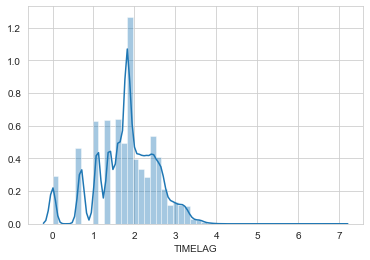

In [41]:
sns.distplot(data['TIMELAG'])

Let's start knowing how many values will be removed if we decide to drop all the values beyond the upper wisker.

In [42]:
iqr = np.percentile(data['TIMELAG'],75) - np.percentile(data['TIMELAG'],25)
upper_limit = np.percentile(data['TIMELAG'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['TIMELAG'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 3.68
The number of points outise the upper wisker is:  139


## Filtering outliers

Let's explore two different ways to drop outliers.

### Filter function. filter(lambda_function, column)

In [43]:
points = list(filter(lambda x: x < upper_limit, data['TIMELAG']))
len(points)

85661

### Panda's approach

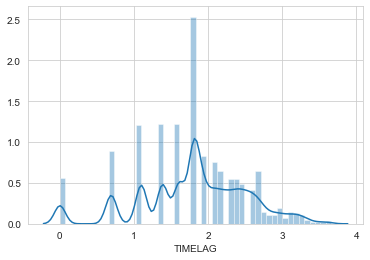

In [44]:
data = data[data['TIMELAG'] < upper_limit]
sns.distplot(data['TIMELAG'])
plt.show()

# Activity:

Let's learn how the following functions work::

*   Map
*   Filter
*   Reduce

## Map

This function, applies another given function to every element of a set.
It works **elementwise**.

In [45]:
list(map(str,range(15)))

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14']

## Filter

This other function also works elementwise but it returns the elements which met a condition.

In [46]:
list(filter(lambda x: x %2 == 0,range(15)))

[0, 2, 4, 6, 8, 10, 12, 14]

## Reduce

This other function performs some computation on a list and returns the output of that computation applied all over the list. Is **NOT ELEMENTWISE**

In [47]:
from functools import reduce

lst = list(range(6))
print("The list is: ",lst)
print("The result of appliying the reduce over the list is: ",reduce(lambda a,b: a+b,lst))

The list is:  [0, 1, 2, 3, 4, 5]
The result of appliying the reduce over the list is:  15


# Lesson 1 Key Concepts

## Selecting categorical data

In [48]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,IL,,XXXX,,F,T2,U,,L4E
1,CA,,XXXX,,M,S1,H,,L2G
2,NC,,XXXX,,M,R2,H,,L4E
3,CA,,XXXX,,F,R2,H,,L4E
4,FL,,XXXX,X,F,S2,H,,L2F


Let's check the number of missing values for 'PVASTATE' column

In [49]:
data['PVASTATE'].value_counts()

     84349
P     1307
E        5
Name: PVASTATE, dtype: int64

Now for columns 'RECP3'

In [50]:
data['RECP3'].value_counts()

     83948
X     1713
Name: RECP3, dtype: int64

And finally for 'VETERANS' column

In [51]:
data['VETERANS'].value_counts()

     76134
Y     9527
Name: VETERANS, dtype: int64

Those columns have too much missing values. If we drop the rows containing those NA's we're in the risk of shrinking too much our dataset. Currently, we can't do too much with columns for which there are so many missing values, therefore let's drop them.

In [52]:
data = data.drop(columns=['PVASTATE', 'RECP3', 'VETERANS'], axis=1)

# Activity:

For the column 'DOMAIN', discuss which option is better to clean the rows where the values are empty.

*  Option 1: Filtering the rows with the empty values.
*  Option 2: Replacing the empty values with some other category, the most frequently represented value in that column.

In [53]:
data['DOMAIN'].value_counts()

R2    12281
T2    11164
S1    10240
S2     7650
C2     7477
C1     5484
C3     4797
T1     4472
R3     4315
U1     3987
U2     2912
U3     2345
       2005
T3     1999
S3     1714
U4     1619
R1     1200
Name: DOMAIN, dtype: int64

In [54]:
unique_values = list(np.unique(data['DOMAIN']))
print(unique_values)

[' ', 'C1', 'C2', 'C3', 'R1', 'R2', 'R3', 'S1', 'S2', 'S3', 'T1', 'T2', 'T3', 'U1', 'U2', 'U3', 'U4']


This column a lot of many possible different values. It's difficult to think how to impute this values and the number of missing values is quite small compared with the aggregated amount of non missing values. Therefore, dropping the missing values will not hurt.

In [55]:
data = data[data['DOMAIN'].isin(unique_values[1:])]
# Note after you filter, it is a good practice to reset the index
data = data.reset_index(drop=True)
data.head()

,STATE,DOB,MDMAUD,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,3712,XXXX,F,T2,NaN,U,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,1.386294,7.741935
1,CA,5202,XXXX,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,2.890372,15.666667
2,NC,0,XXXX,M,R2,3.0,H,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,2.484907,7.481481
3,CA,2801,XXXX,F,R2,1.0,H,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,2.197225,6.812500
4,FL,2001,XXXX,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,2.639057,6.864865


Let's check what we have now.

In [56]:
data["DOMAIN"].value_counts()

R2    12281
T2    11164
S1    10240
S2     7650
C2     7477
C1     5484
C3     4797
T1     4472
R3     4315
U1     3987
U2     2912
U3     2345
T3     1999
S3     1714
U4     1619
R1     1200
Name: DOMAIN, dtype: int64

In [57]:
#filter(lambda x: x != " ",data['DOMAIN'])

# Lesson 2 Key Concepts

Let's consider the column 'GENDER'

In [58]:
data['GENDER'].value_counts()

F    47477
M    36179
Name: GENDER, dtype: int64

No missing values as we cleaned it this morning ;)

Now let's see if there are differences between the the 'AVGGIFT' by gender.

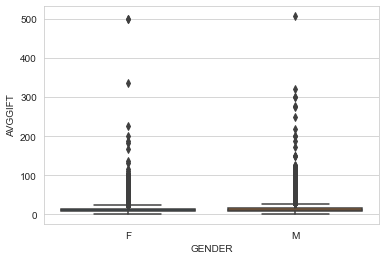

In [59]:
# Visually analyzing categorical data with Target variable
sns.boxplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

(0.0, 200.0)

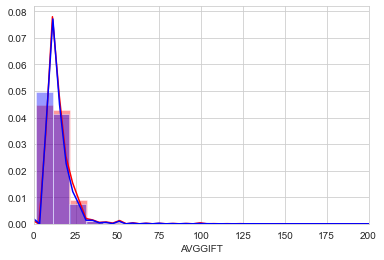

In [60]:
ax1 = sns.distplot(data['AVGGIFT'][data['GENDER'] == 'M'], color = 'Red')
ax2 = sns.distplot(data['AVGGIFT'][data['GENDER'] == 'F'], color = 'Blue')
plt.xlim(0, 200)

Both groups doesn't look too different. They have a few outliers.

**HOWEVER**, be carefull. You don't know now how the distributions look inside the boxes!

Let's check the average gift by gender.

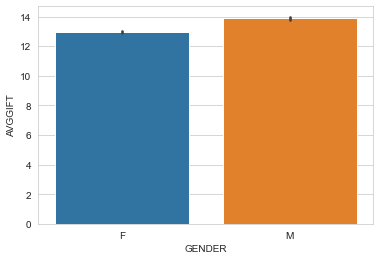

In [61]:
sns.barplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

We can conclude that the company doesn't make significant differences on the gift according to the gender. Therefore let's remove this column.

In [62]:
data = data.drop(columns=['GENDER'], axis=1)

# Activity:

There is a more efficient way to use map over pandas dataframes, and it is called [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [63]:
#data['GENDER'] = data['GENDER'].apply(lambda x: 'other' if x in ['',' ' ,'U', 'C', 'J', 'A'] else x)

# Lesson 3 Key Concepts.

## Dealing with a large number of categories

Let's inspect the column 'STATE'

In [64]:
state_values = list(np.unique(data['STATE']))
state_values

['AA',
 'AE',
 'AK',
 'AL',
 'AP',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

Huuummm, there are typos... Which is 'AA'?. A current list of abreviations can be found [here](https://www.ssa.gov/international/coc-docs/states.html)

In [65]:
real_states = ['AL','AK','AS','AZ','AR','CA','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS',
'KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','MP','OH','OK','OR',
'PA','PR','RI','SC','SD','TN','TX','UT','VT','VA','VI','WA','WV','WI','WY']

First we are going to filter out values which doesn't correspond to any of the previous list.

In [66]:
data = data[data['STATE'].isin(real_states)]

Now, let's check the frequencies of each state.

In [67]:
vals = pd.DataFrame(data['STATE'].value_counts())
vals = vals.reset_index()
vals.columns = ['state', 'counts']
vals

,state,counts
0,CA,14890
1,FL,7305
2,TX,6661
3,IL,5759
4,MI,5048
5,NC,3718
6,WA,3046
7,GA,2939
8,IN,2669
9,WI,2497


As we can see there are states which are under represented. We have several options.

*  Group the states in smaller groups.
*  Group under represented states in a single group.
*  A combination of both.

We will use the last option.

Given the previous state frequencies, can you guess any business insigth?

First, let's get the states which are under represented.

In [68]:
group_states_df = vals[vals['counts']<2500]
group_states = list(group_states_df['state'])
group_states

['WI',
 'MO',
 'TN',
 'AZ',
 'MN',
 'OR',
 'CO',
 'SC',
 'AL',
 'KY',
 'LA',
 'OK',
 'IA',
 'KS',
 'MS',
 'NV',
 'AR',
 'NM',
 'NE',
 'UT',
 'ID',
 'MT',
 'HI',
 'AK',
 'SD',
 'WY',
 'ND',
 'NY',
 'OH',
 'VA',
 'PA',
 'MD',
 'NJ',
 'MA',
 'CT',
 'ME',
 'NH',
 'VT',
 'RI',
 'WV',
 'DE',
 'VI',
 'GU',
 'DC']

In [69]:
def clean_state(x):
    if x in group_states:
        return 'other'
    else:
        return x

data['STATE'] = list(map(clean_state, data['STATE']))

What are now our final groups?

In [70]:
new_state_values = list(np.unique(data['STATE']))
new_state_values

['CA', 'FL', 'GA', 'IL', 'IN', 'MI', 'NC', 'TX', 'WA', 'other']

## Binning numerical columns.

Let's see rigth now the 'IC2' column. This column is numerical, but we would like to make it categorical using. **binning**  



In [71]:
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['IC2_NEW'] = pd.cut(data['IC2'],4, labels=ic2_labels) # see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html?highlight=cut#pandas.cut
data['IC2_NEW'].value_counts()

Low          46748
Moderate     33849
High          2505
Very High      466
Name: IC2_NEW, dtype: int64

# Activity:

Use the column MDMAUD to reduce the number of categories to two (XXXX and other).

In [72]:
data['MDMAUD'].value_counts()

XXXX    83362
C1CM       45
L1CM       36
I1CM       24
D2CM       20
D1CM       13
C2CM       13
L2CM        9
C1LM        7
L1LM        7
I2CM        6
D5CM        4
I1LM        3
D2MM        3
D5TM        3
D5MM        3
C2LM        2
C5CM        2
L1MM        1
C5MM        1
I5CM        1
C2MM        1
C1MM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [73]:
#approach using lambda

data["MDMAUD"].apply(lambda x: "other" if x != "XXXX" else x)
#data['MDMAUD_2'] = np.where(data['MDMAUD'] == "XXXX", "XXXX","other")

0         XXXX
1         XXXX
2         XXXX
3         XXXX
4         XXXX
         ...  
83651     XXXX
83652     XXXX
83653     XXXX
83654     XXXX
83655    other
Name: MDMAUD, Length: 83568, dtype: object

In [77]:
# approach using map with logical statement - Elin's 

def grouping(x):
    if x == "XXXX": return "XXXX"   
    else:return "other"

data["MDMAUD"] = list(map(grouping, data["MDMAUD"]))


In [78]:
#Jaan's approch
def clean_mdmaud(x):
    if x != 'XXXX':
        return 'other'
    else:
        return x
data['MDMAUD'] = list(map(clean_mdmaud, data['MDMAUD']))

In [ ]:
#andrew's approach
def MDMAUD_func(text):
    if 'XXXX' in text:
        n='XXXX'
        else: n='Other'
            return n
data['MDMAUD'] = data['MDMAUD'].apply(MDMAUD_func)

In [ ]:
#Janek's aproach

data['MDMAUD'] = np.where(data['MDMAUD'] != 'XXXX', 'other', 'XXXX')

# Lesson 4 Key Concepts.

Regular expressions in Python. 

[see here](https://docs.python.org/3/library/re.html)

[practice here](https://pythex.org/)

*: Matches previous character 0 or more times.

+: Matches previous character 1 or more times.

?: Matches previous character 0 or 1 times (optional).

{}: Matches previous characters however many times specified within:.

{n}: Exactly n times.

{n,}: At least n times.

{n,m}: Between n and m times.

In [ ]:
import re

Let's see some examples.

In [ ]:
text = "The complicit caat interacted with the other cats exactly as we expected."
pattern = "c*t"
print(re.findall(pattern, text))

In [ ]:
text = "The complicit caat interacted with the other cats exactly as we expected."

pattern = 'c*a*t'
print(re.findall(pattern, text))

In [ ]:
text = "The complicit caaaat ct interacted with the other cats exactly as we expected."
pattern = "a+"
print(re.findall(pattern, text))

In [ ]:
text = "Is the correct spelling color or colour?"
pattern = "colou?r"
print(re.findall(pattern, text))

In [ ]:
text = "We can match the following: aaaawwww, aww, awww, awwww, awwwww"
pattern = "aw{3}"
print(re.findall(pattern, text))

In [ ]:
text = "Let's see how we can match the following: aaw, aaww, aawww, awwww, awwwww"
pattern = "aw{1,}"
print(re.findall(pattern, text))

In [ ]:
pattern = "a{2,}w{2,}"
print(re.findall(pattern, text))

In [ ]:
text = "That person wears marvelous trousers."
pattern = 'er'
pattern = '[er]'
re.findall(pattern, text)

In [ ]:
text = '''TKerraPower, A nuclear-energy company founded by Bill Gates,
        is unlikely to follow through on building a demonstration reactor in China,
        due largely to the Trump administration�s crackdown on the country'''

#pattern = '[A-Z][a-z]*'
# pattern = '[A-z]+'
#pattern = '[A-Z][a-z]+'
pattern = '[A-Z][a-z]+ ?[A-Z][a-z]+|[A-Z][a-z]+'
print(re.findall(pattern, text))

\w: Any alphanumeric character.
\W: Any non-alphanumeric character.
\d: Any numeric character.
\D: Any non-numeric character.
\s: Any whitespace characters.
\S: Any non-whitespace characters.

In [ ]:
text = "If you tell the truth, you don't have to remember anything 100."

#pattern = '\w'
pattern = '\w+'
#pattern = '\w*'
# pattern = '\w?'
# pattern = '.'
print(re.findall(pattern, text))

In [ ]:
text = "If you tell the truth, you don't have to remember anything 100."
#pattern = '\w{4}'
pattern = '\w{4,}'
print(re.findall(pattern, text))

In [ ]:
text = """
Aeromexico 800 -237- 6639
Air Canada 888-247-2262
Air Canada Rouge 888-247-2262
Air Creebec 800-567-6567
Air Inuit 800-361-2965
Air North 800-661-0407
Air Tindi 888-545-6794"""
pattern = '\d+-\d+-\d+'
re.findall(pattern, text)

In [ ]:
text = """
Aeromexico 800 -237- 6639
Air Canada 888-247-2262
Air Canada Rouge 888-247-2262
Air Creebec 800-567-6567
Air Inuit 800-361-2965
Air North 800-661-0407
Air Tindi 888-545-6794"""
pattern = '\d+\s*-\s*\d+\s*-\s*\d+'
re.findall(pattern, text)

# Activity:

Create a function to automate the process of reducing the number of values of a categorical column.

In [ ]:
def reduce_categorical(x, to_keep = [], to_replace = [], processed = "Other"):
    if ((x in to_keep) or (to_keep == [] and x not in to_replace)):
        return x
    else:
        return processed

In [ ]:
reduce_categorical('CA')

In [ ]:
reduce_categorical('ID', to_replace=['ID'])

In [ ]:
def add_numbers(x,y, optional = 0 ):
  if (optional != 0):
    return x+y+optional
  else:
    return x+y

In [ ]:
add_numbers(5,4, optional = 13)

In [81]:
data.head()

,STATE,DOB,MDMAUD,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_NEW
0,IL,3712,XXXX,T2,NaN,U,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,1.386294,7.741935,Low
1,CA,5202,XXXX,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,2.890372,15.666667,High
2,NC,0,XXXX,R2,3.0,H,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,2.484907,7.481481,Low
3,CA,2801,XXXX,R2,1.0,H,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,2.197225,6.812500,Moderate
4,FL,2001,XXXX,S2,3.0,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,2.639057,6.864865,Low


In [82]:
data.to_csv('unit4_partially_processed.csv', index=False) 